In [39]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk.corpus import brown
from nltk import pos_tag, RegexpParser
import matplotlib.pyplot as plt
import string


from newspaper import Article

def textMining(url, url2, url3, url4, url5):
    
    article1 = Article(url, language="en")
    article1.download() 
    article1.parse() 
    article1.nlp()
    
    article2 = Article(url2, language="en")
    article2.download() 
    article2.parse() 
    article2.nlp()
    
    article3 = Article(url3, language="en") 
    article3.download() 
    article3.parse() 
    article3.nlp()
    
    article4 = Article(url4, language="en") 
    article4.download() 
    article4.parse() 
    article4.nlp()
    
    article5 = Article(url5, language="en")
    article5.download() 
    article5.parse() 
    article5.nlp()

    # print("Article Title:") 
    # print(article.title) #prints the title of the article
    print("\n") 
    text = " ".join((article1.text, article2.text, article3.text, article4.text, article5.text))
    text=text.lower()

    # tokeniziranje texta
    tokenizedText=sent_tokenize(text)
    print(tokenizedText)
    print("")

    #tokeniziranje rijeci - 1., 2., 3. zadatak
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenizedWord = tokenizer.tokenize(text)
    print("")

    #izbacivanje stop rijeci iz texta - 6. zadatak
    stop_words=set(stopwords.words("english"))
    #print(stop_words)

    filteredTokenizedWords=[]
    for w in tokenizedWord:
        if w not in stop_words:
            filteredTokenizedWords.append(w)
    print("")
    print("Tokenizirane rijeci:",tokenizedWord)
    print("")
    print("Maknute Stop rijeci iz tokeniziranih:",filteredTokenizedWords)
    print("Broj tokeniziranih rijeci: ")
    print(len(tokenizedWord))
    print("")
    print("Broj rijeci nakon Filtriranja Stop rijeci: ")
    print(len(filteredTokenizedWords))
    print("")
    
    #Lemmatizacija - 4. zadatak
    lemmatizer = WordNetLemmatizer()
    lemmatizedWords=[]
    for w in filteredTokenizedWords:
        lemmatizedWords.append(lemmatizer.lemmatize(w))
    print("")
    print("Lemmatizacija:",lemmatizedWords)

    #Steming - 5.zadatak
    ps = PorterStemmer()
    stemmed_words=[]
    for w in filteredTokenizedWords:
        stemmed_words.append(ps.stem(w))
    print("")
    print("Stemming:",stemmed_words)

    #frekvencija rijeci i graficki prikaz - 7. zadatak
    fdist = FreqDist(filteredTokenizedWords)
    print("")
    print(fdist)
    fdist.most_common(2)
    print("")
    print(fdist.most_common(10))
    fdist.plot(30,cumulative=False)
    plt.show()

    #concordance 10 najcescih rijeci - 8. zadatak
    mostFrequentWords = []
    textList = Text(filteredTokenizedWords)
    for w in fdist.most_common(8):
        print(textList.concordance(w[0]))
        mostFrequentWords.append(w[0])


    #kolokacije - 9.zadatak
    print("")
    print("kolokacije")
    print(textList.collocations())

    #Leksicki diverzificitet - 10.zadatak
    print("")
    print("Duzina liste tokeniziranih rijeci: ")
    print(len(filteredTokenizedWords))
    print("Leksicka diversifikacija: ")
    print(len(set(filteredTokenizedWords))/len(filteredTokenizedWords))

    #BROWN - 11.zadatak
    print("")
    print("Brown Categories")
    print(brown.categories())
    #brownCategoriesWords = brown.words(categories='news')
    genres = ['news', 'government']

    cfd = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in brown.categories()
              for word in brown.words(categories=genre))
    cfd.tabulate(conditions=genres, samples=mostFrequentWords)

    #Lingvisticko stablo - 12.zadatak
    tagged = pos_tag(mostFrequentWords)
    chunker = RegexpParser("""
                           NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                           P: {<IN>}               #To extract Prepositions
                           V: {<V.*>}              #To extract Verbs
                           PP: {<P> <NP>}          #To extract Prepostional Phrases
                           VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                           """)
    output = chunker.parse(tagged)
    output.draw()



['(photograph by tom williams/cq-roll call/getty images.)', 'rep. lauren boebert claimed in an interview last wednesday that there had been no coronavirus deaths in texas since the state lifted its pandemic restrictions in march.', '“republicans are just following the science, and since removing the mask mandate two months ago, texas has not reported a single covid death.', 'not one,” boebert told gina loudon during an interview on real america’s voice, a right-wing news outlet.', 'texas gov.', "greg abbott ended the state's mask mandate and allowed for businesses to return to full capacity on march 2. as reported in a previous fact check, this did not mean the state immediately went maskless—many businesses, including some of the largest retail and grocery chains in the state, retained a mask requirement, and cities continued to maintain a mask requirement on public property.", "texas’ seven-day average for new reported coronavirus cases and hospitalization rate continued to decline

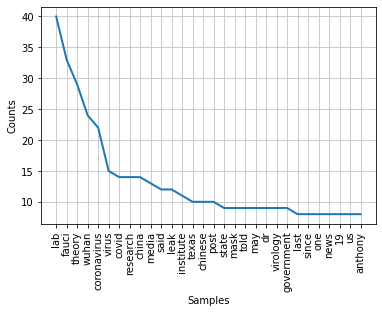

Displaying 25 of 40 matches:
s subcommittee tuesday money provided lab nonprofit ecohealth alliance funded m
ped fund gain function research wuhan lab sen paul due respect entirely entirel
nistration funneled 1 1 million wuhan lab ecohealth alliance also calling top s
ed theory coronavirus created chinese lab look evolution virus bats scientific 
omeone found coronavirus wild brought lab accidentally escaped everything stepw
old groundless narrative virus leaked lab wuhan editor chief hu xijian wrote gl
ll street journal three workers wuhan lab hospitalized november 2019 symptoms c
hether novel coronavirus came chinese lab according cnn inquiry launched allies
tion us intelligence community backed lab leak theory shone light could emerged
leak theory shone light could emerged lab though biden officials shut particula
t origins virus cnn renewed focus put lab theory wall street journal reported t
nowledged coronavirus could developed lab additionally house gop also released 
idence coro

                   lab       fauci      theory       wuhan coronavirus       virus       covid    research 
      news           0           0           2           0           0           0           0          15 
government           0           0           1           0           0           0           0          40 


In [ ]:
def main():
    #textMining('https://www.huffpost.com/entry/mccarthy-condemns-marjorie-taylor-greene-holocaust-mask_n_60ad063de4b0d56a83eedd84',
     #     'https://www.theguardian.com/us-news/2021/may/25/american-adults-covid-coronavirus-vaccine-biden',
      #        'https://www.vox.com/22446173/covid-19-vaccine-variants-fall-winter-summer-coronavirus-pandemic',
       #       'https://www.motherjones.com/politics/2021/05/marjorie-taylor-greene-anti-semitic-vaccination-cards-masks/',
        #      'https://www.politico.com/news/2021/05/25/moderna-covid-19-vaccine-teens-490727') #ljevica

    textMining('https://factcheck.thedispatch.com/p/is-it-true-that-texas-has-reported',
             'https://nypost.com/2021/05/26/fauci-facing-gop-calls-for-resignation-amid-wuhan-lab-controversy/',
            'https://townhall.com/tipsheet/leahbarkoukis/2021/05/26/biden-admin-reportedly-shut-down-investigation-into-covid19-lab-leak-theory-n2590019',
            'https://spectator.us/topic/media-u-turn-lab-leak-coronavirus-theory/',
        'https://www.foxnews.com/media/ted-cruz-mocks-washington-post-clowns-fact-check-wuhan-lab-leak-credible') #desnica
    
    
if __name__ == "__main__":
    main()